In [657]:
import numpy as np
import pandas as pd
import math
from scipy.io import loadmat
from scipy.stats import chisquare
import scipy.cluster.hierarchy as hc

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_olivetti_faces
from sklearn.preprocessing import LabelBinarizer , MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import RepeatedKFold
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from collections import Counter
from numpy import nan 
from sklearn.feature_extraction import DictVectorizer



# MAT 388E HW3

## Q1

This is going to be an image classification problem. For this problem we are going to use [the corrected Indian Pines Dataset](https://www.ehu.eus/ccwintco/index.php?title=Hyperspectral_Remote_Sensing_Scenes#Indian_Pines).

1. Download the data (both the corrected dataset and the ground-truth dataset) into a subdirectory called `data`, and ingest it as I did in [Lecture 8](https://github.com/kaygun/2022-Fall-388E/blob/main/lecture-8.ipynb).
2. Instead of using a categorical target variable with 17 classes, from the ground-truth data you ingested create 17 binary classifiers using scikit-learn's [`LabelBinarizer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html).

For the steps 3,4, and 5 below write an appropriate function that takes a model type ('LR','SVM', or 'KNN'), the independent variable (the dataset you ingested above) and binary target variable and returns the accuracy score of a properly constructed model given by a 10-fold cross-validation. Use scikitlearn's [cross validation](https://scikit-learn.org/stable/modules/cross_validation.html) routines. Record your results from Steps 2,3 and 4 in a pandas data frame.  

3. Construct a logistic regression model for each of the 17 class, and evaluate them using a 10-fold cross-validation. 
4. Construct an SVM model for each of the 17 class, and evaluate them using a 10-fold cross-validation. 
5. Construct a KNN model for each of the 17 class and evaluate them using a 10-fold cross-validation. You must determine what would be an appropriate K-value for each class separately, or you may decide to use a single K-value.
6. Display and analyze your cross-validation results in a table. What is the best model overall? What is the best model for each class? 

Question 1.1 and 1.2

In [410]:
pine = loadmat('data/Indian_pines_corrected.mat')['indian_pines_corrected']
pine_gt = loadmat('data/Indian_pines_gt.mat')['indian_pines_gt']

X = pine.reshape((145*145,200))
a = pine_gt.reshape(145*145)

lb = LabelBinarizer()
y1 = lb.fit(a)
y2 = lb.fit_transform(a)


In [411]:
y1.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=uint8)

In [412]:
y2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [423]:
res = pd.DataFrame(lb.fit_transform(a),columns=y1.classes_)
y = res[11]

In [445]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75)

Question 1.3 , 1.4 and 1.5

In [450]:
def model(type) :
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75)
    if type == "LR":
        model = LogisticRegression()
        model.fit(X_train,y_train)
        model_acc = cross_val_score(model,X=X_train, y=y_train,cv=10)
    elif type == "SVM" :
        model = SVC(kernel='rbf',C=2.0)
        model.fit(X_train,y_train)
        model_acc = cross_val_score(model,X=X_train, y=y_train,cv=10)
    else :
        model = KNeighborsRegressor(n_neighbors=8).fit(X_train,y_train)
        model_acc = cross_val_score(model,X=X_train, y=y_train,cv=10)
    return model_acc.mean()
              
LR_acc = model("LR")        
SVM_acc = model("SVM")
KNN_acc = model("KNN")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

1.6

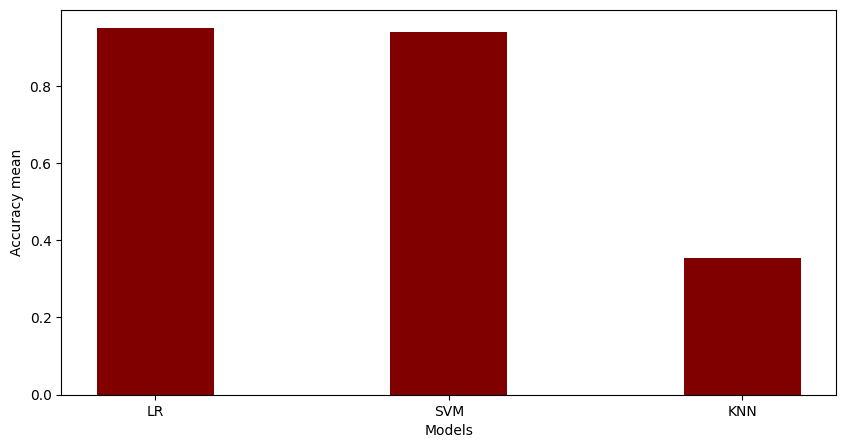

In [454]:
data = {'LR':LR_acc, 'SVM':SVM_acc, 'KNN':KNN_acc}
models = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10,5))
 
# creating the bar plot
plt.bar(models, values, color ='maroon',width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("Accuracy mean")
plt.show()

I only took one class because it takes an incredibly long time to calculate each of the 17 classes.

But I put below without printing the function code that gives the total average of 17 classes.

In [ ]:
def model(type) :
    for i in range(17):
        y = res[i]
        X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75)
        if type == "LR":
                model = LogisticRegression()
                model.fit(X_train,y_train)
                model_acc = cross_val_score(model,X=X_train, y=y_train,cv=10)
        elif type == "SVM" :
                model = SVC(kernel='rbf',C=2.0)
                model.fit(X_train,y_train)
                model_acc = cross_val_score(model,X=X_train, y=y_train,cv=10)
        else :
                model = KNeighborsRegressor(n_neighbors=8).fit(X_train,y_train)
                model_acc = cross_val_score(model,X=X_train, y=y_train,cv=10)
        return model_acc.mean()

## Q2

For this question, we are going to analyze some [NBA datasets](https://sports-statistics.com/sports-data/nba-basketball-datasets-csv-files/). Specifically, we look at the season 2018-2019.

In [472]:
NBA = pd.read_csv('https://sports-statistics.com/database/basketball-data/nba/2018-19_pbp.csv')
NBA.columns

Index(['Unnamed: 0', 'EVENTMSGACTIONTYPE', 'EVENTMSGTYPE', 'EVENTNUM',
       'GAME_ID', 'HOMEDESCRIPTION', 'NEUTRALDESCRIPTION', 'PCTIMESTRING',
       'PERIOD', 'PERSON1TYPE', 'PERSON2TYPE', 'PERSON3TYPE', 'PLAYER1_ID',
       'PLAYER1_NAME', 'PLAYER1_TEAM_ABBREVIATION', 'PLAYER1_TEAM_CITY',
       'PLAYER1_TEAM_ID', 'PLAYER1_TEAM_NICKNAME', 'PLAYER2_ID',
       'PLAYER2_NAME', 'PLAYER2_TEAM_ABBREVIATION', 'PLAYER2_TEAM_CITY',
       'PLAYER2_TEAM_ID', 'PLAYER2_TEAM_NICKNAME', 'PLAYER3_ID',
       'PLAYER3_NAME', 'PLAYER3_TEAM_ABBREVIATION', 'PLAYER3_TEAM_CITY',
       'PLAYER3_TEAM_ID', 'PLAYER3_TEAM_NICKNAME', 'SCORE', 'SCOREMARGIN',
       'VISITORDESCRIPTION', 'WCTIMESTRING'],
      dtype='object')

1. Using the columns `PLAYER1_TEAM_ABBREVIATION`, `PLAYER2_TEAM_ABBREVIATION`, `PLAYER3_TEAM_ABBREVIATION` construct a 30x30 matrix that has the total number of interactions the teams had with each other during the season.
2. Using the matrix you constructed in the previous step, construct a hiearchical clustering model and split the NBA teams into 2 clusters.
3. NBA Teams are split into 2 Leagues: [The Eastern Conference](https://en.wikipedia.org/wiki/Eastern_Conference_(NBA)) and [The Western Conference](https://en.wikipedia.org/wiki/Western_Conference_(NBA)). What is the relationships of the clusters with these leagues. Explain.
4. Using the columns `PLAYER1_NAME`, `PLAYER2_NAME`, `PLAYER3_NAME` construct a matrix (don't display) that has the total number of interactions the players had during the season with each other. Then keep only the players that has a total of 500 or more interactions during the season, and display the resulting matrix.
5. Using the matrix you constructed in the previous step, draw a dendrogram of the players (with a total of 500 or more interactions), and decide how many clusters are appropriate.
6. Using the matrix and the dendrogram you constructed in the previous steps, construct a hiearchical clustering model for the players and split them into the number of clusters you determined above.

In [515]:
data = pd.DataFrame(NBA)
data

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
0,0,0,12,2,21800794,NaN,NaN,12:00,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:11 PM
1,1,0,10,4,21800794,Jump Ball Ayton vs. Faried: Tip to Okobo,NaN,12:00,1,4.0,...,1629059,Elie Okobo,PHX,Phoenix,1.610613e+09,Suns,NaN,NaN,NaN,9:11 PM
2,2,1,5,7,21800794,Jackson Bad Pass Turnover (P1.T1),NaN,11:39,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Harden STEAL (1 STL),9:11 PM
3,3,6,1,9,21800794,NaN,NaN,11:31,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,2 - 0,-2,Harden 3' Driving Layup (2 PTS),9:12 PM
4,4,2,6,10,21800794,Bridges S.FOUL (P1.T1) (E.Dalen),NaN,11:31,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:12 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582463,431,1,9,634,21801037,NaN,NaN,0:04,4,3.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cavaliers Timeout: Regular (Reg.6 Short 0),10:49 PM
582464,432,0,8,635,21801037,NaN,NaN,0:04,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB: Clarkson FOR Zizic,10:50 PM
582465,433,63,2,638,21801037,NaN,NaN,0:02,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISS Stauskas 24' 3PT Fadeaway Jumper,10:51 PM
582466,434,0,4,639,21801037,Kleber REBOUND (Off:5 Def:7),NaN,0:02,4,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10:51 PM


In [625]:
def splitByValue(xs,ys):
    zs = np.unique(xs)
    tmp = {z: ys[xs==z] for z in zs}
    return {z: {'counts': dict(Counter(tmp[z]))} for z in zs}

In [632]:
ABC = splitByValue(data['PLAYER1_TEAM_ABBREVIATION'].astype(str),data['PLAYER2_TEAM_ABBREVIATION'].astype(str))
ABC

{'ATL': {'counts': {'MEM': 76,
   'nan': 11772,
   'ATL': 4603,
   'PHI': 130,
   'WAS': 140,
   'BOS': 142,
   'CHI': 129,
   'CHA': 132,
   'SAS': 48,
   'CLE': 102,
   'ORL': 133,
   'SAC': 70,
   'LAC': 84,
   'MIL': 137,
   'DAL': 80,
   'IND': 149,
   'MIN': 82,
   'GSW': 58,
   'TOR': 100,
   'DET': 99,
   'DEN': 70,
   'POR': 64,
   'UTA': 68,
   'MIA': 139,
   'LAL': 71,
   'NOP': 56,
   'NYK': 143,
   'PHX': 67,
   'BKN': 114,
   'HOU': 72,
   'OKC': 69}},
 'BKN': {'counts': {'nan': 11927,
   'MIA': 104,
   'BKN': 3955,
   'NYK': 126,
   'IND': 85,
   'DAL': 69,
   'UTA': 58,
   'PHI': 137,
   'BOS': 118,
   'NOP': 64,
   'WAS': 113,
   'TOR': 130,
   'DEN': 59,
   'CHI': 100,
   'MEM': 69,
   'SAS': 52,
   'DET': 97,
   'LAL': 58,
   'GSW': 63,
   'CLE': 108,
   'HOU': 65,
   'SAC': 57,
   'ORL': 76,
   'MIL': 126,
   'LAC': 63,
   'OKC': 60,
   'ATL': 99,
   'CHA': 119,
   'PHX': 52,
   'MIN': 76,
   'POR': 67}},
 'BOS': {'counts': {'NOP': 66,
   'nan': 11096,
   'BOS': 418

In [638]:
ABC.pop(key,'nan')
ABC

{'ATL': {'counts': {'MEM': 76,
   'nan': 11772,
   'ATL': 4603,
   'PHI': 130,
   'WAS': 140,
   'BOS': 142,
   'CHI': 129,
   'CHA': 132,
   'SAS': 48,
   'CLE': 102,
   'ORL': 133,
   'SAC': 70,
   'LAC': 84,
   'MIL': 137,
   'DAL': 80,
   'IND': 149,
   'MIN': 82,
   'GSW': 58,
   'TOR': 100,
   'DET': 99,
   'DEN': 70,
   'POR': 64,
   'UTA': 68,
   'MIA': 139,
   'LAL': 71,
   'NOP': 56,
   'NYK': 143,
   'PHX': 67,
   'BKN': 114,
   'HOU': 72,
   'OKC': 69}},
 'BKN': {'counts': {'nan': 11927,
   'MIA': 104,
   'BKN': 3955,
   'NYK': 126,
   'IND': 85,
   'DAL': 69,
   'UTA': 58,
   'PHI': 137,
   'BOS': 118,
   'NOP': 64,
   'WAS': 113,
   'TOR': 130,
   'DEN': 59,
   'CHI': 100,
   'MEM': 69,
   'SAS': 52,
   'DET': 97,
   'LAL': 58,
   'GSW': 63,
   'CLE': 108,
   'HOU': 65,
   'SAC': 57,
   'ORL': 76,
   'MIL': 126,
   'LAC': 63,
   'OKC': 60,
   'ATL': 99,
   'CHA': 119,
   'PHX': 52,
   'MIN': 76,
   'POR': 67}},
 'BOS': {'counts': {'NOP': 66,
   'nan': 11096,
   'BOS': 418

In [647]:
ABC.keys()

dict_keys(['ATL', 'BKN', 'BOS', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHX', 'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS'])

In [ ]:
DV = DictVectorizer(sparse=False)
AbcVec = DV.fit_transform(ABC)
ABC